#Bank Marketing Dataset

Nama : Leticia

Batch : 5

Kode Peserta : PYTN-KS20-023

Python for Data Science

##Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

**bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary:**'yes', 'no'**)

##A. Persiapan data untuk ditampilkan

Dari keempat Dataset yang disebutkan di atas, Dataset yang akan digunakan adalah **bank-additional-full.csv**

**Pengimportan file csv karena dikerjakan melalui Google Colab**

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Persiapan import library**

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import warnings

from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.simplefilter(action='ignore', category=FutureWarning)

**Membaca data pada file .csv**

In [188]:
df = pd.read_csv('/content/drive/MyDrive/Dataset3/bank-additional-full.csv', sep = ";")

**Menunjukkan 10 data pertama**

In [189]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Menunjukkan 10 data terakhir**

In [190]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


**Melihat Jumlah Baris dan Kolom pada Dataset**

In [191]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  41188 
Jumlah Kolom:  21


**Melihat informasi detail mengenai Dataset**

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Menjabarkan kolom-kolom yang ada pada Dataset**

In [193]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**Menemukan nilai unique pada Dataset**

In [194]:
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

 job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

 marital
['married' 'single' 'divorced' 'unknown']

 education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 default
['no' 'unknown' 'yes']

 housing
['no' 'yes' 'unknown']

 loan
['no' 'yes' 'unknown']

 contact
['telephone' 'cellular']

 month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

 day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

 duration
[ 261  149  226 ... 1246 1556 1868]

 campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

**Mengecek Jumlah Missing Values**

In [195]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Mencari Jumlah Data Duplikat**

In [196]:
df.duplicated().sum()

12

**Menghapus Data Duplikat dan Mengecek Kembali**

In [197]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

**Mengelompokkan Variabel dari masing-masing Kolom berdasarkan Tipe Datanya**

In [198]:
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

##B. Data Visualization

In [199]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Melihat Distribusi Data untuk tipe data Numeric melalui Histogram**

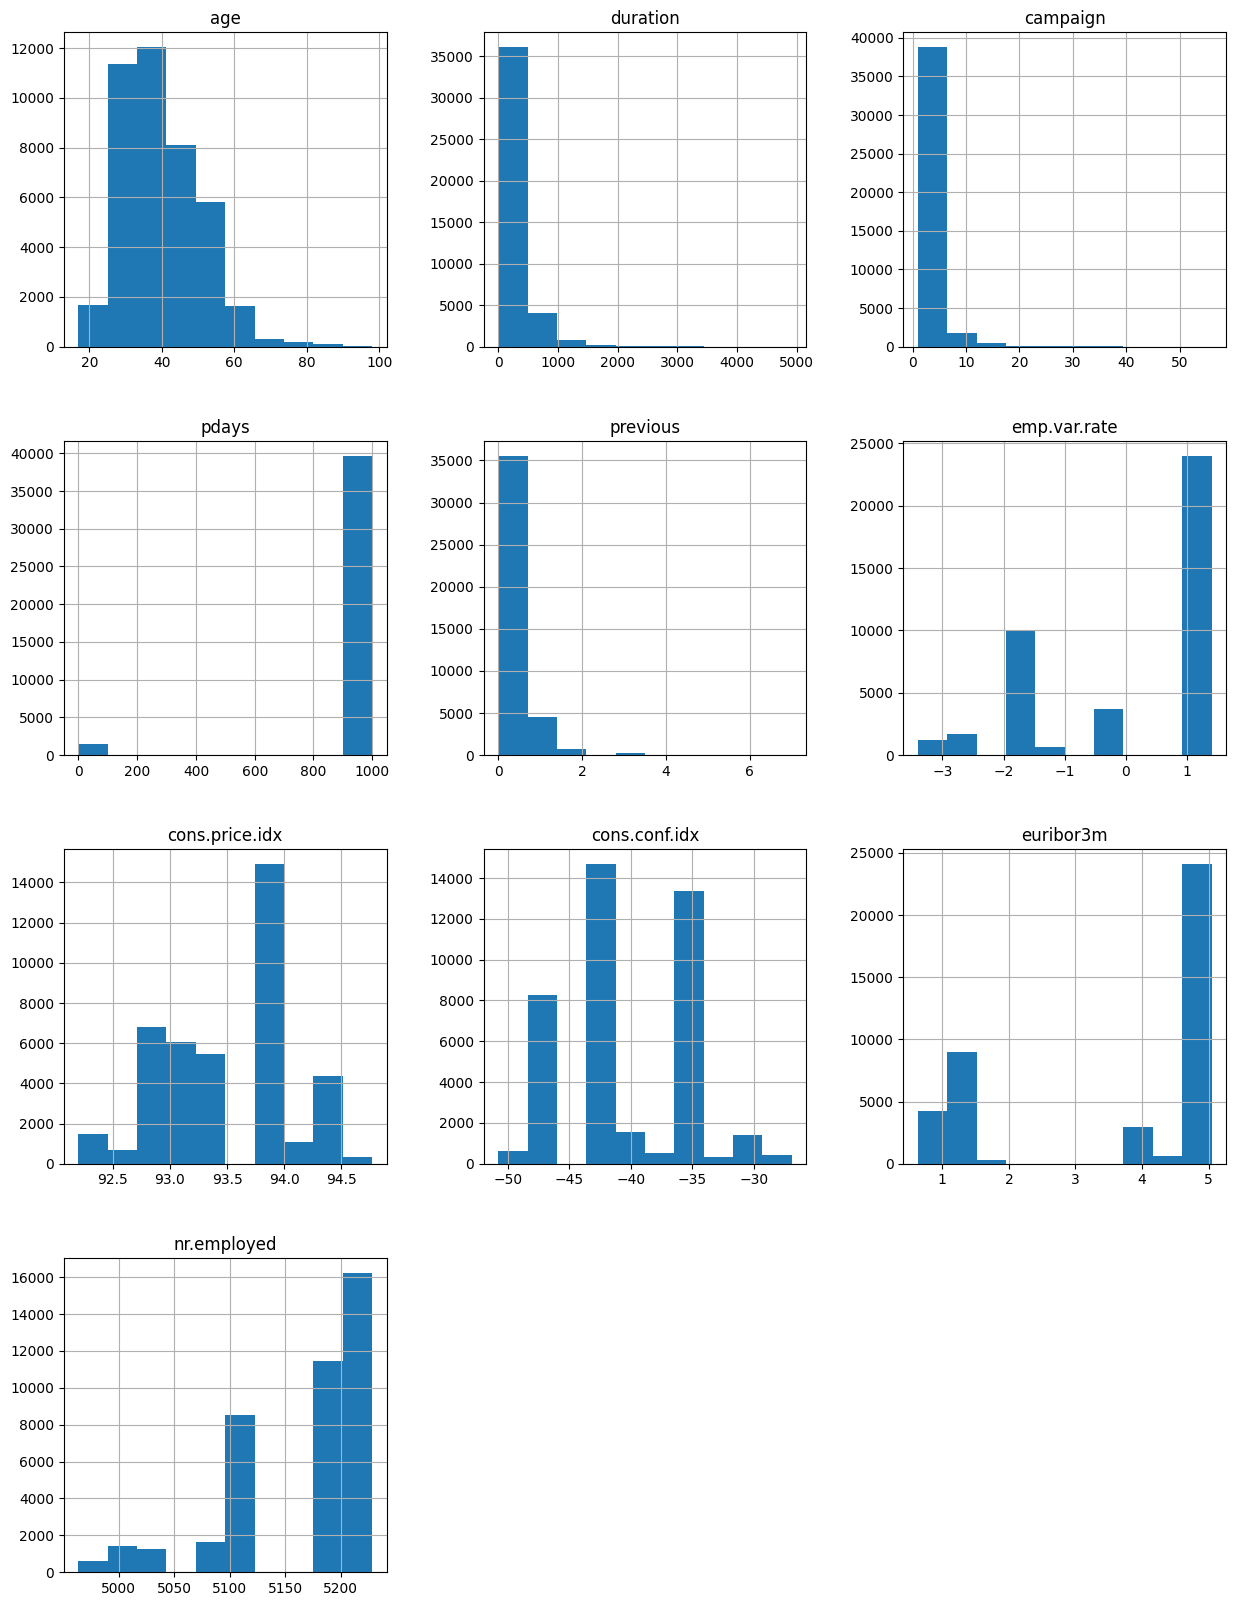

In [200]:
df.hist(figsize=(15,20))
plt.show()

**Kesimpulan:** Dapat dilihat bahwa dari Histogram tersebut, distribusi datanya tidak normal

**Menampilkan persentase client yang bergabung dengan campaign ini melalui Pie Chart**

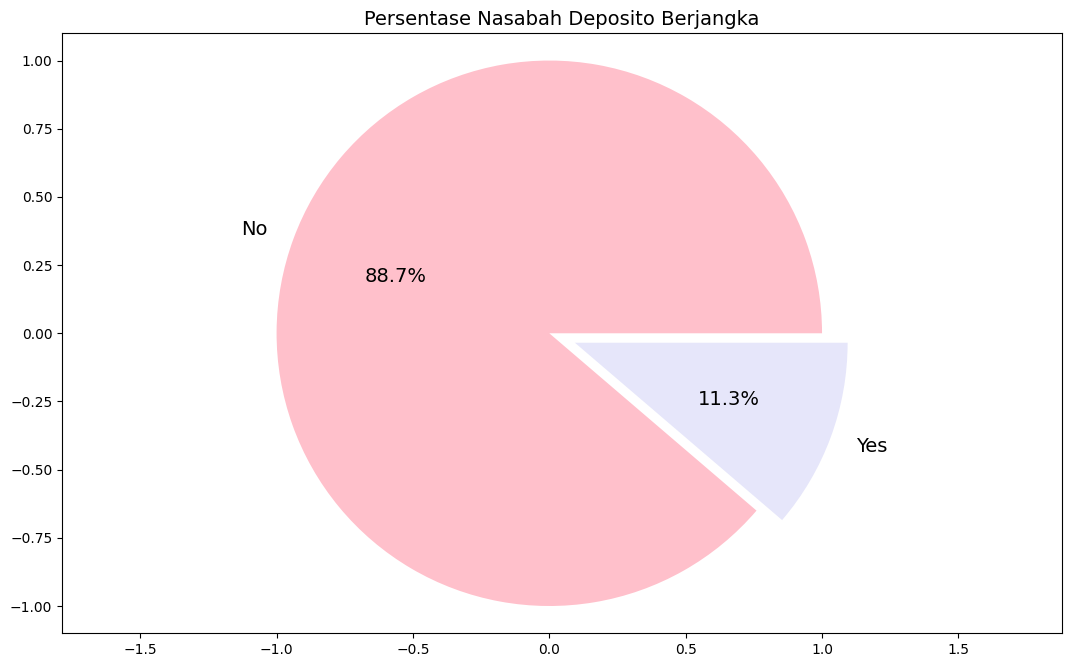

In [201]:
label = ["No", "Yes"]
color = ["pink", "lavender"]
explode = (0, 0.1)
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax.pie(df['y'].value_counts(),
       labels = label,
       colors = color,
       explode = explode,
       autopct ='%1.1f%%',
       frame = True,
       textprops = dict(color ="black", size=14))
ax.axis('equal')
plt.title('Persentase Nasabah Deposito Berjangka',
     color = 'black',
     fontsize = 14)

plt.show()

**Kesimpulan:** Persentase total nasabah yang mau berlangganan deposito berjangka sebesar 11.27% dan nasabah yang tidak berlangganan sebesar 88.73%.

**Membuat Cross Tab untuk Exploratory Data Analysis**

In [202]:
def cross_tab(df,x1,x2):
    jobs = list(df[x1].unique())
    edus = list(df[x2].unique())
    dataframes=[]
    for i in edus:
        data_i=df[df[x2]==i]
        data_i_job=data_i.groupby(x1).count()[x2]
        dataframes.append(data_i_job)
    new_cross=pd.concat(dataframes,axis=1)
    new_cross.columns = edus
    new_cross=new_cross.fillna(0)
    return new_cross

In [203]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5750,1.0
blue-collar,2318,878,1425,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,97,284,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2680,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


In [204]:
#Mengisi data 'unknown' dengan data yang relevan
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5750,1.0
blue-collar,2366.0,878,1447.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,111.0,285,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2830,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


Bisa dilihat bahwa ada beberapa perubahan nilai pada cell-cell tertentu dari tabel pertama ke tabel kedua

##C. Pemrosesan Data

###Melakukan Encode Data

In [205]:
category = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for cols in category:
    df[cols] = label_encoder.fit_transform(df[cols])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


##D. Data Modelling

In [206]:
train,test = train_test_split(df,test_size = 0.30 ,random_state = 350)
X_train = train.drop(labels='y',axis=1)
y_train = train['y']

X_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

**Di bawah ini akan dilakukan Pemodelan, Menguji dataset, memprediksi output, dan Membuat Confusion Matrix dari masing-masing jenis Data Modelling**

###i. Logistic Regression

In [207]:
log_reg = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=50)
log_reg.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = log_reg.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred))
print("Nilai Akurasi Logistic Regression:",metrics.accuracy_score(y_test, y_pred), '\n')




              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10962
           1       0.67      0.42      0.52      1391

    accuracy                           0.91     12353
   macro avg       0.80      0.70      0.73     12353
weighted avg       0.90      0.91      0.90     12353

Nilai Akurasi Logistic Regression: 0.9116813729458431 



In [208]:
conf_mtx = confusion_matrix(y_test, y_pred)
print(conf_mtx)

[[10679   283]
 [  808   583]]


###ii. K-Nearest Neighbors

In [209]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred1))
print("Nilai Akurasi K-Nearest Neighbors :",metrics.accuracy_score(y_test, y_pred1), '\n')




              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10962
           1       0.69      0.30      0.42      1391

    accuracy                           0.91     12353
   macro avg       0.80      0.64      0.68     12353
weighted avg       0.89      0.91      0.89     12353

Nilai Akurasi K-Nearest Neighbors : 0.9060147332631749 



In [210]:
conf_mtx1 = confusion_matrix(y_test, y_pred1)
print(conf_mtx1)

[[10773   189]
 [  972   419]]


###iii Support Vector Machine

In [211]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred2))
print("Nilai Akurasi Support Vector Machine :",metrics.accuracy_score(y_test, y_pred2), '\n')




              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10962
           1       0.64      0.27      0.38      1391

    accuracy                           0.90     12353
   macro avg       0.78      0.63      0.66     12353
weighted avg       0.88      0.90      0.88     12353

Nilai Akurasi Support Vector Machine : 0.9009147575487736 



In [212]:
conf_mtx2 = confusion_matrix(y_test, y_pred2)
print(conf_mtx2)

[[10751   211]
 [ 1013   378]]


###iv. Desicion Tree Classifier

In [213]:
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
dtc = dtc.fit(X_train,y_train)
y_pred3 = dtc.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred3))
print("Nilai Akurasi Desicion Tree Classifier :",metrics.accuracy_score(y_test, y_pred3), '\n')




              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10962
           1       0.65      0.55      0.59      1391

    accuracy                           0.92     12353
   macro avg       0.80      0.75      0.77     12353
weighted avg       0.91      0.92      0.91     12353

Nilai Akurasi Desicion Tree Classifier : 0.9158099247146442 



In [214]:
conf_mtx3 = confusion_matrix(y_test, y_pred3)
print(conf_mtx3)

[[10552   410]
 [  630   761]]


###v. Random Forest Classifier

In [215]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_pred4 = rfc.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred4))
print("Nilai Akurasi Random Forest Classifier :",metrics.accuracy_score(y_test, y_pred4), '\n')




              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10962
           1       0.66      0.53      0.59      1391

    accuracy                           0.92     12353
   macro avg       0.80      0.75      0.77     12353
weighted avg       0.91      0.92      0.91     12353

Nilai Akurasi Random Forest Classifier : 0.916376588682911 



In [216]:
conf_mtx4 = confusion_matrix(y_test, y_pred4)
print(conf_mtx4)

[[10579   383]
 [  650   741]]


###vi. Naive Bayes

In [217]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred5 = gnb.predict(X_test)

print('\n\n')
print(classification_report(y_test, y_pred5))
print("Nilai Akurasi Naive Bayes :",metrics.accuracy_score(y_test, y_pred5), '\n')




              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10962
           1       0.39      0.61      0.47      1391

    accuracy                           0.85     12353
   macro avg       0.67      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353

Nilai Akurasi Naive Bayes : 0.8474864405407593 



In [218]:
conf_mtx5 = confusion_matrix(y_test, y_pred5)
print(conf_mtx5)

[[9621 1341]
 [ 543  848]]


##E. Model Evaluation

**Mengevaluasi dan Membandingkan Nilai Akurasi dari semua jenis Data Modelling yang telah dilakukan**

In [219]:
print("Berikut adalah rangkuman nilai akurasi dari berbagai data modelling yang telah dilakukan:")
print("Logistic Regression:",metrics.accuracy_score(y_test, y_pred))
print("K-Nearest Neighbors:",metrics.accuracy_score(y_test, y_pred1))
print("Support Vector Machine:",metrics.accuracy_score(y_test, y_pred2))
print("Decision Tree Classifier:",metrics.accuracy_score(y_test, y_pred3))
print("Random Forest Classifier:",metrics.accuracy_score(y_test, y_pred4))
print("Naive Bayes:",metrics.accuracy_score(y_test, y_pred5))

Berikut adalah rangkuman nilai akurasi dari berbagai data modelling yang telah dilakukan:
Logistic Regression: 0.9116813729458431
K-Nearest Neighbors: 0.9060147332631749
Support Vector Machine: 0.9009147575487736
Decision Tree Classifier: 0.9158099247146442
Random Forest Classifier: 0.916376588682911
Naive Bayes: 0.8474864405407593


#Kesimpulan

*  Hanya 11.3 % client yang memutuskan untuk menjadi nasabah di bank, dan sisanya 88.7 % client memutuskan untuk tidak bergabung menjadi nasabah bank.

Dari semua jenis Data Modelling yang dilakukan, dapat disimpulkan:
*  Hanya Naive Bayes yang nilainya berada < 90%
*  Kelima model lainnya memiliki perbedaan yang tidak signifikan
*  Model dengan nilai akurasi tertinggi adalah model Random Forest Classifier yaitu dengan tingkat akurasi sebesar 91,71%. Artinya Random Forest Classifier cocok untuk digunakan untuk memprediksi atau mengukur keputusan nasabah di masa yang akan datang.